# Importing of Library Functions

In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor

In [2]:
data = pd.read_csv("couriers_target_assignment_data.csv")

In [3]:
data.describe()

,CourierId,RouteCode,IdleTimeMinutes,stopsDistance_median,OutForDeliveryProductType1,OutForDeliveryProductType2,OutForDeliveryProductType3,OutForDeliveryProductType4,OutForDeliveryProductType5,FirstOFD,TotalWeight,TotalOrderValue,PlannedCollection,DeliveryStops,CollectionStops
count,28865.000000,28865.000000,22451.000000,21375.000000,16304.00000,17387.000000,11787.000000,11442.000000,24378.000000,24220.000000,24320.000000,18926.000000,19738.000000,23986.000000,15335.000000
mean,66149.558635,491.529084,80.797292,816.090936,11.66542,24.807385,5.170442,32.526044,9.731192,45.135590,94.812198,3010.756826,10.261779,39.228842,7.295598
std,39829.517483,156.596674,74.548303,1203.415364,10.83618,54.235774,5.171180,26.927236,14.365507,48.496311,337.287614,7463.180500,11.406456,22.149021,7.149054
min,1676.000000,3.000000,-531.000000,20.104322,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.003000,1.000000,1.000000,1.000000
25%,26528.000000,360.000000,44.000000,272.951665,3.00000,7.000000,2.000000,7.000000,1.000000,29.000000,21.000000,440.720250,3.000000,25.000000,2.000000
50%,83620.000000,486.000000,68.000000,430.235054,8.00000,19.000000,3.000000,34.000000,4.000000,44.000000,34.651500,1783.085000,6.000000,41.000000,5.000000
75%,102533.000000,613.000000,97.000000,737.554750,18.00000,34.000000,7.000000,54.000000,13.000000,57.000000,126.876500,4220.587000,14.000000,52.000000,10.000000
max,128004.000000,791.000000,859.000000,9959.063090,76.00000,3104.000000,56.000000,1001.000000,205.000000,3099.000000,30742.608000,358441.561000,329.000000,973.000000,100.000000


In [4]:
data.shape

(28865, 18)

## Target Variable for the Problem ('TotalStops')

In [5]:
data_1 = data.copy()

data_1["TotalStops"] = data_1["DeliveryStops"] + data_1["CollectionStops"]

In [6]:
data_1

,Date,CourierId,RouteCode,IdleTimeMinutes,runSheetTime,StartTime,stopsDistance_median,OutForDeliveryProductType1,OutForDeliveryProductType2,OutForDeliveryProductType3,OutForDeliveryProductType4,OutForDeliveryProductType5,FirstOFD,TotalWeight,TotalOrderValue,PlannedCollection,DeliveryStops,CollectionStops,TotalStops
0,2020-03-02,1676,481,NaN,NaN,19:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1,2020-03-02,1692,260,115.0,07:41:00,09:36:00,560.144616,22.0,8.0,NaN,NaN,13.0,34.0,148.098,2349.622,13.0,30.0,11.0,41.0
2,2020-03-02,1703,463,94.0,07:26:00,09:00:00,4936.342118,NaN,NaN,NaN,15.0,0.0,13.0,7.500,NaN,NaN,14.0,NaN,NaN
3,2020-03-02,1707,615,39.0,09:03:00,09:42:00,266.148889,4.0,3.0,1.0,24.0,8.0,34.0,17.543,190.717,13.0,33.0,12.0,45.0
4,2020-03-02,1727,313,29.0,08:10:56,08:39:00,217.069458,8.0,8.0,1.0,1.0,31.0,41.0,56.976,1859.955,23.0,31.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28860,2020-05-31,10771,682,371.0,05:30:00,11:41:16,755.909297,17.0,12.0,7.0,16.0,14.0,52.0,72.940,3788.241,2.0,30.0,NaN,NaN
28861,2020-05-31,96907,259,61.0,10:40:56,11:41:00,131.257694,12.0,88.0,12.0,NaN,5.0,93.0,237.003,6643.466,35.0,96.0,20.0,116.0
28862,2020-05-31,57903,520,75.0,09:06:45,10:21:27,262.801863,4.0,42.0,4.0,NaN,27.0,62.0,63.658,1363.646,NaN,56.0,NaN,NaN
28863,2020-05-31,23774,445,10.0,10:25:00,10:35:52,455.911613,3.0,11.0,1.0,39.0,22.0,62.0,47.399,847.695,11.0,58.0,3.0,61.0


#### Preparing a count for the rows which have IdleTimeMinutes and stopsDistance_median as NaN 

In [7]:
total = 0
idx_dropped = []
for index, row in data_1.iterrows():
    if (np.isnan(row["IdleTimeMinutes"]) == True) or (np.isnan(row["stopsDistance_median"]) == True):
        total += 1
        idx_dropped.append(index)
print(total)

8581


In [8]:
data_1

,Date,CourierId,RouteCode,IdleTimeMinutes,runSheetTime,StartTime,stopsDistance_median,OutForDeliveryProductType1,OutForDeliveryProductType2,OutForDeliveryProductType3,OutForDeliveryProductType4,OutForDeliveryProductType5,FirstOFD,TotalWeight,TotalOrderValue,PlannedCollection,DeliveryStops,CollectionStops,TotalStops
0,2020-03-02,1676,481,NaN,NaN,19:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1,2020-03-02,1692,260,115.0,07:41:00,09:36:00,560.144616,22.0,8.0,NaN,NaN,13.0,34.0,148.098,2349.622,13.0,30.0,11.0,41.0
2,2020-03-02,1703,463,94.0,07:26:00,09:00:00,4936.342118,NaN,NaN,NaN,15.0,0.0,13.0,7.500,NaN,NaN,14.0,NaN,NaN
3,2020-03-02,1707,615,39.0,09:03:00,09:42:00,266.148889,4.0,3.0,1.0,24.0,8.0,34.0,17.543,190.717,13.0,33.0,12.0,45.0
4,2020-03-02,1727,313,29.0,08:10:56,08:39:00,217.069458,8.0,8.0,1.0,1.0,31.0,41.0,56.976,1859.955,23.0,31.0,21.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28860,2020-05-31,10771,682,371.0,05:30:00,11:41:16,755.909297,17.0,12.0,7.0,16.0,14.0,52.0,72.940,3788.241,2.0,30.0,NaN,NaN
28861,2020-05-31,96907,259,61.0,10:40:56,11:41:00,131.257694,12.0,88.0,12.0,NaN,5.0,93.0,237.003,6643.466,35.0,96.0,20.0,116.0
28862,2020-05-31,57903,520,75.0,09:06:45,10:21:27,262.801863,4.0,42.0,4.0,NaN,27.0,62.0,63.658,1363.646,NaN,56.0,NaN,NaN
28863,2020-05-31,23774,445,10.0,10:25:00,10:35:52,455.911613,3.0,11.0,1.0,39.0,22.0,62.0,47.399,847.695,11.0,58.0,3.0,61.0


# Outlier Handling

C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ankit\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


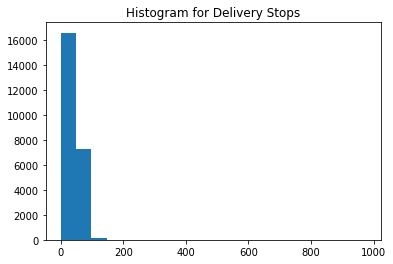

In [9]:
plt.hist(data_1["DeliveryStops"].values.T, bins = 20)
plt.title("Histogram for Delivery Stops")
plt.show()

### Threshold value for handling outlier for 'Delivery Stops'

In [10]:
mu_ds = data_1["DeliveryStops"].mean()
mu_ds

39.22884182439756

In [11]:
sigma_ds = data_1["DeliveryStops"].std()
sigma_ds

22.1490213990557

In [12]:
thres_ds = mu_ds + 6 * sigma_ds                ## Formula used ==> mean + 2(sigma)
thres_ds

172.12297021873178

### Filtering outlier in 'Delivery Stops'

In [13]:
data_1 = data_1[data_1["DeliveryStops"] < thres_ds]     ## Dropping values greater than threshold

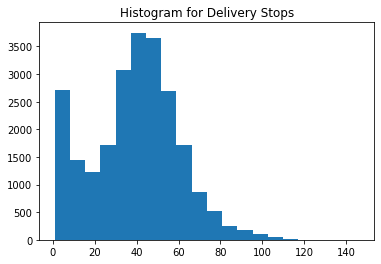

In [14]:
plt.hist(data_1["DeliveryStops"].values.T, bins = 20)
plt.title("Histogram for Delivery Stops")
plt.show()

In [15]:
data_1

,Date,CourierId,RouteCode,IdleTimeMinutes,runSheetTime,StartTime,stopsDistance_median,OutForDeliveryProductType1,OutForDeliveryProductType2,OutForDeliveryProductType3,OutForDeliveryProductType4,OutForDeliveryProductType5,FirstOFD,TotalWeight,TotalOrderValue,PlannedCollection,DeliveryStops,CollectionStops,TotalStops
1,2020-03-02,1692,260,115.0,07:41:00,09:36:00,560.144616,22.0,8.0,NaN,NaN,13.0,34.0,148.098,2349.622,13.0,30.0,11.0,41.0
2,2020-03-02,1703,463,94.0,07:26:00,09:00:00,4936.342118,NaN,NaN,NaN,15.0,0.0,13.0,7.500,NaN,NaN,14.0,NaN,NaN
3,2020-03-02,1707,615,39.0,09:03:00,09:42:00,266.148889,4.0,3.0,1.0,24.0,8.0,34.0,17.543,190.717,13.0,33.0,12.0,45.0
4,2020-03-02,1727,313,29.0,08:10:56,08:39:00,217.069458,8.0,8.0,1.0,1.0,31.0,41.0,56.976,1859.955,23.0,31.0,21.0,52.0
5,2020-03-02,1751,389,162.0,07:14:00,09:56:00,2851.934311,15.0,21.0,3.0,NaN,5.0,27.0,66.268,6224.009,8.0,24.0,7.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28860,2020-05-31,10771,682,371.0,05:30:00,11:41:16,755.909297,17.0,12.0,7.0,16.0,14.0,52.0,72.940,3788.241,2.0,30.0,NaN,NaN
28861,2020-05-31,96907,259,61.0,10:40:56,11:41:00,131.257694,12.0,88.0,12.0,NaN,5.0,93.0,237.003,6643.466,35.0,96.0,20.0,116.0
28862,2020-05-31,57903,520,75.0,09:06:45,10:21:27,262.801863,4.0,42.0,4.0,NaN,27.0,62.0,63.658,1363.646,NaN,56.0,NaN,NaN
28863,2020-05-31,23774,445,10.0,10:25:00,10:35:52,455.911613,3.0,11.0,1.0,39.0,22.0,62.0,47.399,847.695,11.0,58.0,3.0,61.0


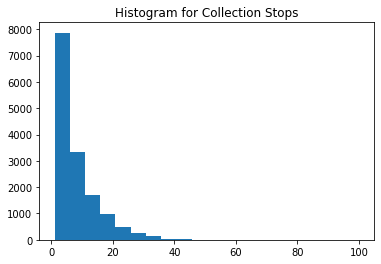

In [16]:
plt.hist(data_1["CollectionStops"].values.T, bins = 20)
plt.title("Histogram for Collection Stops")
plt.show()

### Threshold value for handling outlier for 'Collection Stops'

In [17]:
mu_cs = data_1["CollectionStops"].mean()
mu_cs

7.429168070057258

In [18]:
sigma_cs = data_1["CollectionStops"].std()
sigma_cs

7.205059237740681

In [19]:
thres_cs = mu_cs + 6 * sigma_cs                ## Formula used ==> mean + 2(sigma)
thres_cs

50.65952349650134

### Filtering outlier in 'Collection Stops'

In [20]:
data_1 = data_1[data_1["DeliveryStops"] < thres_cs]     ## Dropping values greater than threshold

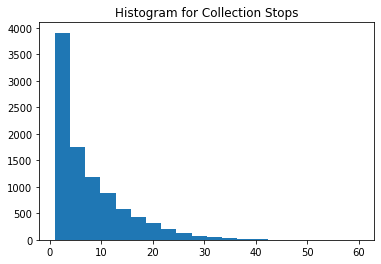

In [21]:
plt.hist(data_1["CollectionStops"].values.T, bins = 20)
plt.title("Histogram for Collection Stops")
plt.show()

In [22]:
data_1

,Date,CourierId,RouteCode,IdleTimeMinutes,runSheetTime,StartTime,stopsDistance_median,OutForDeliveryProductType1,OutForDeliveryProductType2,OutForDeliveryProductType3,OutForDeliveryProductType4,OutForDeliveryProductType5,FirstOFD,TotalWeight,TotalOrderValue,PlannedCollection,DeliveryStops,CollectionStops,TotalStops
1,2020-03-02,1692,260,115.0,07:41:00,09:36:00,560.144616,22.0,8.0,NaN,NaN,13.0,34.0,148.098,2349.622,13.0,30.0,11.0,41.0
2,2020-03-02,1703,463,94.0,07:26:00,09:00:00,4936.342118,NaN,NaN,NaN,15.0,0.0,13.0,7.500,NaN,NaN,14.0,NaN,NaN
3,2020-03-02,1707,615,39.0,09:03:00,09:42:00,266.148889,4.0,3.0,1.0,24.0,8.0,34.0,17.543,190.717,13.0,33.0,12.0,45.0
4,2020-03-02,1727,313,29.0,08:10:56,08:39:00,217.069458,8.0,8.0,1.0,1.0,31.0,41.0,56.976,1859.955,23.0,31.0,21.0,52.0
5,2020-03-02,1751,389,162.0,07:14:00,09:56:00,2851.934311,15.0,21.0,3.0,NaN,5.0,27.0,66.268,6224.009,8.0,24.0,7.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28854,2020-05-31,84036,262,87.0,08:26:00,09:53:20,343.790655,3.0,18.0,3.0,NaN,21.0,42.0,19.564,487.695,20.0,36.0,8.0,44.0
28855,2020-05-31,1751,389,167.0,06:47:00,09:34:35,3412.120757,15.0,28.0,1.0,1.0,17.0,25.0,56.130,3024.206,10.0,25.0,5.0,30.0
28856,2020-05-31,23163,390,57.0,07:47:04,08:44:33,193.341591,10.0,34.0,2.0,NaN,4.0,46.0,141.479,1427.564,12.0,45.0,8.0,53.0
28857,2020-05-31,26596,744,16.0,08:18:00,08:34:00,NaN,1.0,NaN,NaN,NaN,28.0,28.0,6.500,5.722,NaN,17.0,NaN,NaN


# Feature Engineering

In [23]:
data_2 = data_1.copy()
for i in range(1,6):
    data_2[f"OFDProductType{i}Ratio"] = data_2[f"OutForDeliveryProductType{i}"] / (data_2["OutForDeliveryProductType1"]+
                            data_2["OutForDeliveryProductType2"] + data_2["OutForDeliveryProductType3"] +
                            data_2["OutForDeliveryProductType4"] + data_2["OutForDeliveryProductType5"])
data_2["FirstOFDRatio"] = data_1["FirstOFD"] / (data_1["OutForDeliveryProductType1"] + 
                            data_2["OutForDeliveryProductType2"] + data_2["OutForDeliveryProductType3"]+
                            data_2["OutForDeliveryProductType4"] + data_2["OutForDeliveryProductType5"])

In [24]:
primefeatures = data_2.drop(['StartTime', 'PlannedCollection', 'DeliveryStops', 'CollectionStops', 
            'Date', 'CourierId', 'RouteCode', 'runSheetTime', 'OutForDeliveryProductType1', 
            'OutForDeliveryProductType2', 'OutForDeliveryProductType3', 'OutForDeliveryProductType4', 
            'OutForDeliveryProductType5', 'TotalStops'], axis=1)
targetvariable = data_2[['TotalStops']]

primefeatures = primefeatures.replace(np.nan,0.0)
targetvariable = targetvariable.replace(np.nan, 0.0)

In [25]:
primefeatures.describe()

,IdleTimeMinutes,stopsDistance_median,FirstOFD,TotalWeight,TotalOrderValue,OFDProductType1Ratio,OFDProductType2Ratio,OFDProductType3Ratio,OFDProductType4Ratio,OFDProductType5Ratio,FirstOFDRatio
count,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000,17107.000000
mean,76.709709,827.749319,35.293681,82.656415,1812.468417,0.029527,0.045055,0.008820,0.027242,0.025967,0.110428
std,81.492006,1284.063625,44.802295,391.327769,7097.418966,0.094396,0.128462,0.030826,0.105764,0.096559,0.281201
min,-531.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,216.654064,21.000000,15.981000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,430.450502,37.000000,27.800000,423.024000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,93.000000,798.743623,47.000000,91.576000,2261.633000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,859.000000,9959.063090,3099.000000,30742.608000,358441.561000,0.805970,0.896552,0.638298,0.943396,0.884615,1.000000


In [26]:
targetvariable.describe()

,TotalStops
count,17107.000000
mean,21.511720
std,22.851357
min,0.000000
25%,0.000000
50%,11.000000
75%,44.000000
max,103.000000


# Pearsons Correlation Map

,IdleTimeMinutes,stopsDistance_median,FirstOFD,TotalWeight,TotalOrderValue,OFDProductType1Ratio,OFDProductType2Ratio,OFDProductType3Ratio,OFDProductType4Ratio,OFDProductType5Ratio,FirstOFDRatio
IdleTimeMinutes,1.000000,-0.120431,0.020406,-0.006864,0.033993,0.043423,0.027952,0.003410,0.008552,-0.007856,0.019814
stopsDistance_median,-0.120431,1.000000,-0.119162,0.037494,0.025702,-0.045973,-0.078095,-0.070872,-0.054109,-0.062506,-0.085792
FirstOFD,0.020406,-0.119162,1.000000,0.099323,0.484472,0.058450,0.060966,0.039931,0.042174,0.038298,0.072592
TotalWeight,-0.006864,0.037494,0.099323,1.000000,0.281913,0.027178,0.028351,0.007953,-0.012101,-0.003275,0.012437
TotalOrderValue,0.033993,0.025702,0.484472,0.281913,1.000000,0.085458,0.061484,0.029267,0.006638,0.007315,0.049228
OFDProductType1Ratio,0.043423,-0.045973,0.058450,0.027178,0.085458,1.000000,0.695445,0.458359,0.356304,0.357640,0.751317
OFDProductType2Ratio,0.027952,-0.078095,0.060966,0.028351,0.061484,0.695445,1.000000,0.689809,0.380442,0.489015,0.873104
OFDProductType3Ratio,0.003410,-0.070872,0.039931,0.007953,0.029267,0.458359,0.689809,1.000000,0.373902,0.463992,0.720978
OFDProductType4Ratio,0.008552,-0.054109,0.042174,-0.012101,0.006638,0.356304,0.380442,0.373902,1.000000,0.234064,0.640666
OFDProductType5Ratio,-0.007856,-0.062506,0.038298,-0.003275,0.007315,0.357640,0.489015,0.463992,0.234064,1.000000,0.683604


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

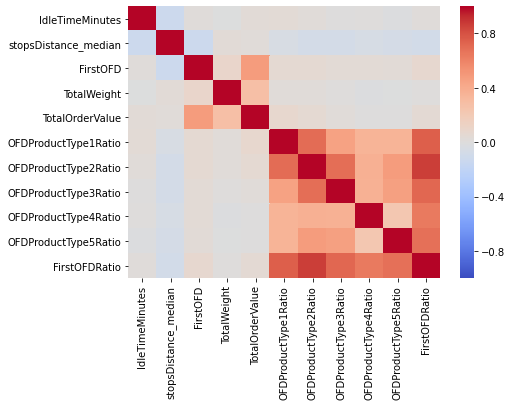

In [27]:
#calculating the correlation matrix
corr = primefeatures.corr(method = "pearson")

#display the correlation matrix
display(corr)

#plot the correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = 'coolwarm', vmin = -1, vmax = 1)
plt.yticks(rotation=0)

# Training of Model

### Training is done using both Decision Tree Regressor as well as Random Forest Regressor

In [28]:
X = primefeatures.values
y = targetvariable.values

In [29]:
from sklearn.model_selection import train_test_split  # Import train_test_split function
from sklearn import metrics                           #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, random_state = 5)

### Decision Tree Regressor

In [30]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
clf = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [31]:
#Get predictions
y_predict_test = clf.predict(X_test)
y_predict_train = clf.predict(X_train)

#getting evaluvation parameters for training and testing
model_rmse_test = np.sqrt(mean_squared_error(y_test, y_predict_test))
model_rmse_train = np.sqrt(mean_squared_error(y_train, y_predict_train))
model_r2_test = r2_score(y_test, y_predict_test)
model_r2_train = r2_score(y_train, y_predict_train)
model_r_test = np.sqrt(r2_score(y_test, y_predict_test))
model_r_train = np.sqrt(r2_score(y_train, y_predict_train))
model_mae_test = mean_absolute_error(y_test, y_predict_test)
model_mae_train = mean_absolute_error(y_train, y_predict_train)

#display the parameters
print("----RMSE---")
print(f"Training RMSE:{model_rmse_train:.4}")
print(f"Testing RMSE:{model_rmse_test:.4}")
print("----MAE---")
print(f"Training MAE:{model_mae_train:.4}")
print(f"Testing MAE:{model_mae_test:.4}")
print("----r2---")
print(f"Training r2:{model_r2_train:.4}")
print(f"Testing r2:{model_r2_test:.4}")

----RMSE---
Training RMSE:0.09055
Testing RMSE:22.66
----MAE---
Training MAE:0.004048
Testing MAE:13.88
----r2---
Training r2:1.0
Testing r2:-0.0234


C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


### Random Forest Regressor

In [32]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf_1 = RandomForestRegressor(n_estimators=200,
        criterion = 'mse', 
        max_depth=25, 
        min_samples_split=2, 
        min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, 
        max_features='auto')

#Train the model using the training sets y_pred=clf_1.predict(X_test)
clf_1.fit(X_train,y_train)

y_pred = clf_1.predict(X_test)

C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [33]:
#Get predictions
y_predict_test_1 = clf_1.predict(X_test)
y_predict_train_1 = clf_1.predict(X_train)

#getting evaluvation parameters for training and testing
model_rmse_test_1 = np.sqrt(mean_squared_error(y_test, y_predict_test))
model_rmse_train_1 = np.sqrt(mean_squared_error(y_train, y_predict_train))
model_r2_test_1 = r2_score(y_test, y_predict_test)
model_r2_train_1 = r2_score(y_train, y_predict_train)
model_r_test_1 = np.sqrt(r2_score(y_test, y_predict_test))
model_r_train_1 = np.sqrt(r2_score(y_train, y_predict_train))
model_mae_test_1 = mean_absolute_error(y_test, y_predict_test)
model_mae_train_1 = mean_absolute_error(y_train, y_predict_train)

#display the parameters
print("----RMSE---")
print(f"Training RMSE:{model_rmse_train_1:.4}")
print(f"Testing RMSE:{model_rmse_test_1:.4}")
print("----MAE---")
print(f"Training MAE:{model_mae_train_1:.4}")
print(f"Testing MAE:{model_mae_test_1:.4}")
print("----r2---")
print(f"Training r2:{model_r2_train_1:.4}")
print(f"Testing r2:{model_r2_test_1:.4}")

----RMSE---
Training RMSE:0.09055
Testing RMSE:22.66
----MAE---
Training MAE:0.004048
Testing MAE:13.88
----r2---
Training r2:1.0
Testing r2:-0.0234


C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


In [34]:
data_2.to_csv('data_cleaned.csv')

# Quantile Regression

In [35]:
from sklearn.datasets import make_regression
from lightgbm import LGBMRegressor

In [36]:
df = pd.read_csv('data_cleaned.csv')

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.95, random_state = 5)

In [38]:
classifiers = {}
for tau in [0.1, 0.3, 0.5, 0.7, 0.9]:
    clf_2 = LGBMRegressor(objective ='quantile', alpha = tau)
    clf_2.fit(X_train, y_train)
    preds = clf_2.predict(X_test)
    classifiers[str(tau)] = preds

C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ankit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [39]:
df = pd.DataFrame(classifiers)
df['y_test'] = y_test

In [40]:
for tau in [0.1, 0.3, 0.5, 0.7, 0.9]:
    df[f'residual: {str(tau)}'] = df[str(tau)] - df['y_test']

In [41]:
df

,0.1,0.3,0.5,0.7,0.9,y_test,residual: 0.1,residual: 0.3,residual: 0.5,residual: 0.7,residual: 0.9
0,0.000000,0.000000,8.632532,43.892776,50.993931,0.0,0.000000,0.000000,8.632532,43.892776,50.993931
1,11.249024,26.061648,29.542400,33.491936,40.475559,34.0,-22.750976,-7.938352,-4.457600,-0.508064,6.475559
2,0.000000,42.558136,45.614013,46.360345,53.359899,0.0,0.000000,42.558136,45.614013,46.360345,53.359899
3,0.000000,0.000000,0.000292,36.898648,47.741373,0.0,0.000000,0.000000,0.000292,36.898648,47.741373
4,0.000000,0.000000,0.471293,6.310244,13.430385,0.0,0.000000,0.000000,0.471293,6.310244,13.430385
...,...,...,...,...,...,...,...,...,...,...,...
851,0.000000,42.498109,42.819637,46.167187,53.133599,0.0,0.000000,42.498109,42.819637,46.167187,53.133599
852,0.000000,0.000000,0.070921,0.987400,6.811027,0.0,0.000000,0.000000,0.070921,0.987400,6.811027
853,11.249024,45.905439,49.684444,53.178327,59.308314,45.0,-33.750976,0.905439,4.684444,8.178327,14.308314
854,36.899029,51.232772,56.833592,54.788461,66.287185,60.0,-23.100971,-8.767228,-3.166408,-5.211539,6.287185


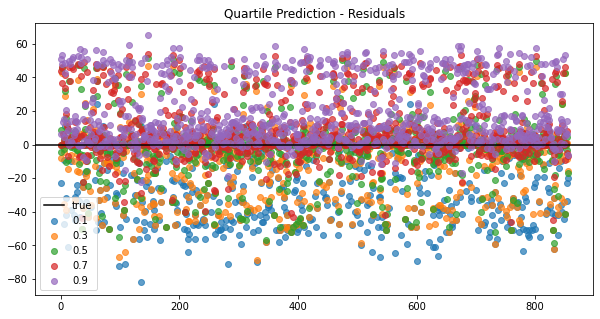

In [42]:
plt.figure(figsize = (10, 5))
plt.scatter(df.index.values, df['residual: 0.1'], alpha = 0.7, label = 0.1)
plt.scatter(df.index.values, df['residual: 0.3'], alpha = 0.7, label = 0.3)
plt.scatter(df.index.values, df['residual: 0.5'], alpha = 0.7, label = 0.5)
plt.scatter(df.index.values, df['residual: 0.7'], alpha = 0.7, label = 0.7)
plt.scatter(df.index.values, df['residual: 0.9'], alpha = 0.7, label = 0.9)
plt.axhline(y = 0, color = 'k', linestyle = '-', label = 'true')
plt.title('Quartile Prediction - Residuals')
plt.legend()
plt.show()